In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

# 1. Load JSON from URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
response = requests.get(url)
response.raise_for_status()
data = response.json()

df = pd.DataFrame(data)

# 2. Inspect structure (run once to see keys)
print(type(data))
print(len(data))

df.head(5)


<class 'list'>
27005


,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


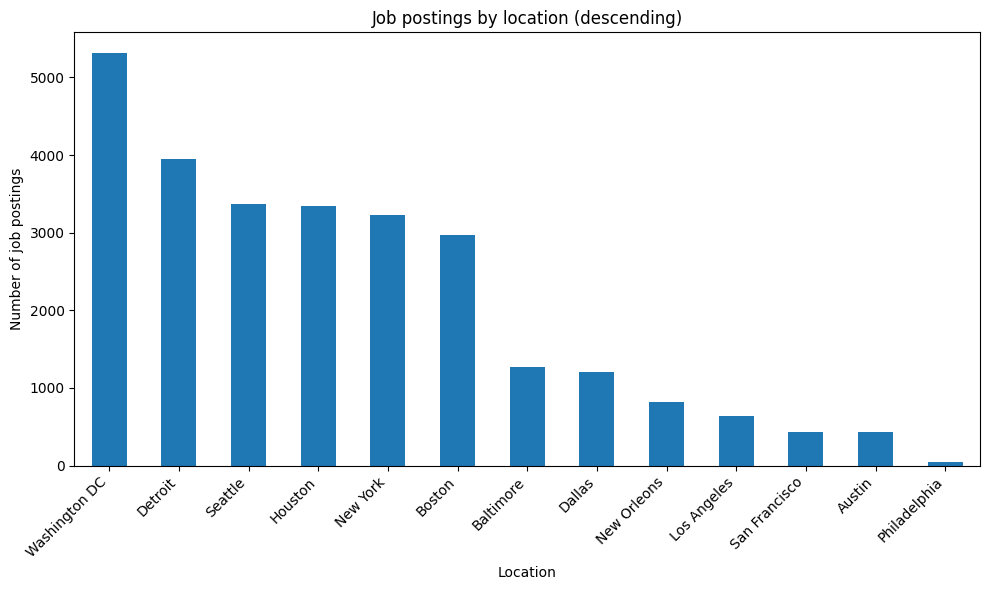

In [4]:

# Example A: bar plot of job postings per location
counts_loc = (
    df["Location"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
counts_loc.plot(kind="bar")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of job postings")
plt.title("Job postings by location (descending)")
plt.tight_layout()
plt.show()


In [13]:

# Example B: bar plot of job postings per job title
counts_title = df.groupby('Job Title').size().nlargest(10)
counts_title

Job Title
Sales Executive                   119
Business Development Executive    117
PHP Developer                     117
Business Development Manager       98
Java Developer                     80
Software Engineer                  80
Android Developer                  77
Graphic Designer                   77
Content Writer                     74
Sales Manager                      71
dtype: int64

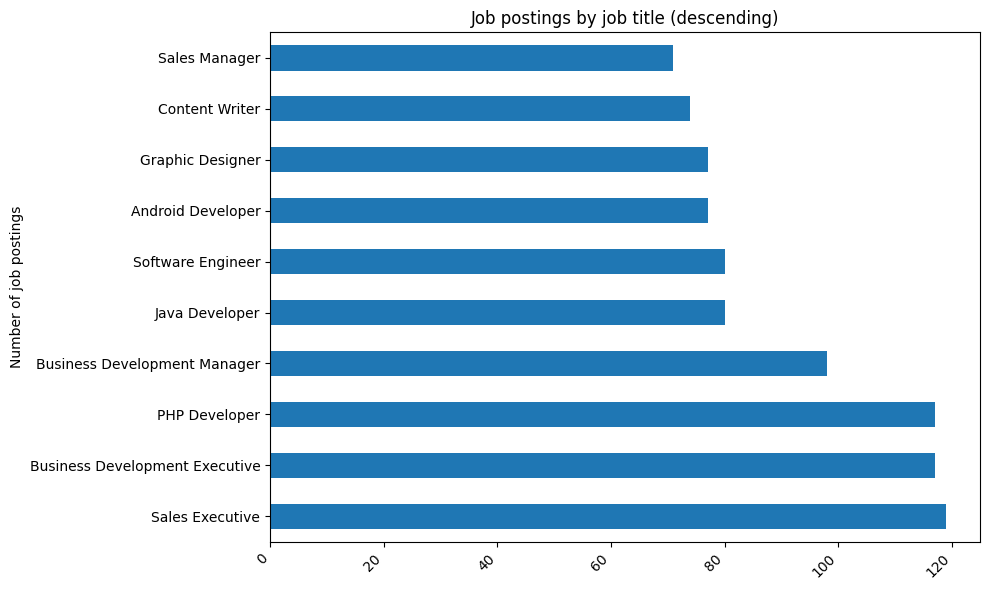

In [15]:
plt.figure(figsize=(10, 6))
counts_title.plot(kind="barh")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of job postings")
plt.title("Job postings by job title (descending)")
plt.tight_layout()
plt.show()
